# Seattle Building Permits

I've been wanting to do some research into the building boom here in Seattle for a while.  Thanks to the city's [open data initiative](https://data.seattle.gov/browse?sortBy=most_accessed&sortPeriod=week) powered by Socrata, there is readily available information to get started.  Perhaps ultimately this could be tied into a larger project around affordable housing.  I know that there is a basic supply and demand arguement to be made for how all these cranes are going to help the situation, but just based on my own observations, there seem to be way more luxury high rises than modest housing units going up.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

## Get Data

In [2]:
api_endpoint = "https://data.seattle.gov/resource/i5jq-ms7b.json"
permits = pd.read_json(api_endpoint)
permits.head()

,:@computed_region_2day_rhn5,:@computed_region_cyqu_gs94,:@computed_region_kuhn_3gp2,:@computed_region_q256_3sug,action_type,address,applicant_name,application_date,application_permit_number,category,...,latitude,location,location_address,longitude,master_use_permit,permit_and_complaint_status_url,permit_type,status,value,work_type
0,NaN,NaN,28.0,18792.0,NEW,1233 NE 88TH ST,"BIDDLE, DAVE",2016-12-19T00:00:00.000,6564183,SINGLE FAMILY / DUPLEX,...,47.691846,"{'coordinates': [-122.313688, 47.691846], 'typ...",1233 NE 88TH ST,-122.313688,3025890.0,http://web6.seattle.gov/dpd/PermitStatus/Proje...,Construction,Application Accepted,478973,Plan Review
1,NaN,NaN,48.0,18792.0,ADD/ALT,6008 29TH AVE NE,"JACKSON, LEIF",2016-12-21T00:00:00.000,6563910,SINGLE FAMILY / DUPLEX,...,47.672460,"{'coordinates': [-122.29612, 47.67246], 'type'...",6008 29TH AVE NE,-122.296120,NaN,http://web6.seattle.gov/dpd/PermitStatus/Proje...,Construction,Permit Issued,5655,Plan Review
2,NaN,NaN,13.0,18385.0,ADD/ALT,5214 DELRIDGE WAY SW,"MIHLON, MATTHEW D",2016-09-12T00:00:00.000,6536904,COMMERCIAL,...,47.554495,"{'coordinates': [-122.362727, 47.554495], 'typ...",5214 DELRIDGE WAY SW,-122.362727,NaN,http://web6.seattle.gov/dpd/PermitStatus/Proje...,Construction,Permit Issued,5000,Plan Review
3,NaN,NaN,43.0,18800.0,ADD/ALT,5425 57TH AVE S,"MOODY, WILLIAM",2017-01-23T00:00:00.000,6561114,SINGLE FAMILY / DUPLEX,...,47.552729,"{'coordinates': [-122.262284, 47.552729], 'typ...",5425 57TH AVE S,-122.262284,NaN,http://web6.seattle.gov/dpd/PermitStatus/Proje...,Construction,Permit Issued,1000,No plan review
4,NaN,NaN,18.0,17919.0,ADD/ALT,302 LAKESIDE AVE S,"LAZERWITZ, JAY",NaN,6576550,MULTIFAMILY,...,47.599685,"{'coordinates': [-122.285813, 47.599686], 'typ...",302 LAKESIDE AVE S,-122.285813,NaN,http://web6.seattle.gov/dpd/PermitStatus/Proje...,Construction,Initial Information Collected,0,Plan Review


## Data Cleaning

In [3]:
permits.columns

Index([':@computed_region_2day_rhn5', ':@computed_region_cyqu_gs94',
       ':@computed_region_kuhn_3gp2', ':@computed_region_q256_3sug',
       'action_type', 'address', 'applicant_name', 'application_date',
       'application_permit_number', 'category', 'contractor', 'description',
       'expiration_date', 'final_date', 'issue_date', 'latitude', 'location',
       'location_address', 'longitude', 'master_use_permit',
       'permit_and_complaint_status_url', 'permit_type', 'status', 'value',
       'work_type'],
      dtype='object')

In [4]:
# drop the first 4 columns
permits = permits.iloc[:, 4:]

#extract just date from application timestamp
def extract_dt(timestamp):
    if pd.isnull(timestamp):
        return np.nan
    else:
        date_str = re.sub(r"([0-9]{4}-[0-9]{2}-[0-9]{2})(.*)", r"\1", timestamp)
        return datetime.strptime(date_str, "%Y-%m-%d")

permits['app_date_cleaned'] = [extract_dt(elem) for elem in permits.application_date]

In [5]:
permits.app_date_cleaned[1:10]

1   2016-12-21
2   2016-09-12
3   2017-01-23
4          NaT
5   2016-03-25
6          NaT
7          NaT
8          NaT
9          NaT
Name: app_date_cleaned, dtype: datetime64[ns]

## EDA

In [6]:
permits.shape

(1000, 22)

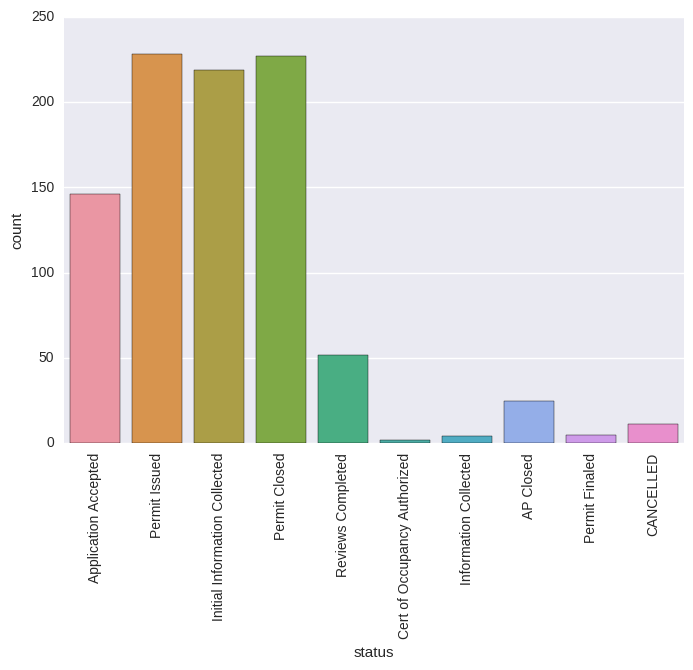

In [7]:
# distribution of permit status
sns.countplot(x = "status", data = permits)
plt.xticks(rotation = 90)
plt.show()

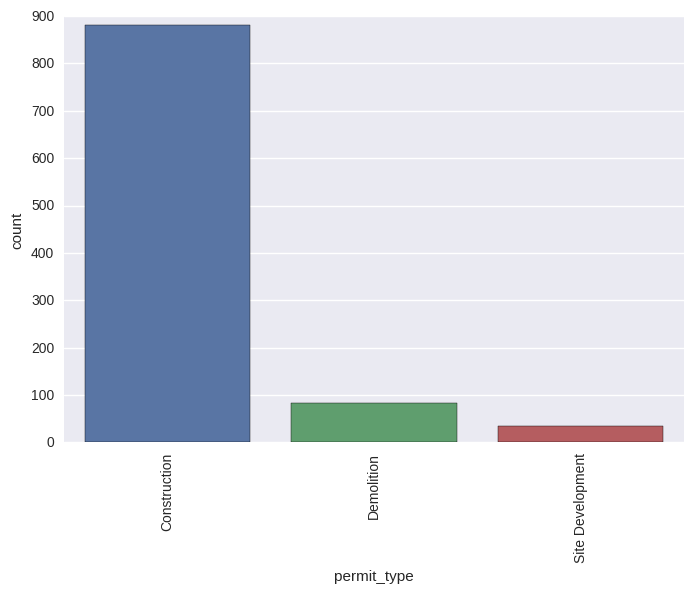

In [8]:
sns.countplot(x = "permit_type", data = permits)
plt.xticks(rotation = 90)
plt.show()